# Análisis de la distribución de opiniones de películas 

Para conocer mejor la distribución gaussiana, vamos a dejar a un lado las notas obtenidas en el examen y vamos a concentrarnos en las críticas de películas.

Estas son las opiniones (calificadas de 0 a 5) obtenidas por una película, donde 5 es la mejor nota que puede obtener la película: las famosas 5 estrellas que podemos encontrar en todos los sitios de críticas de cine.

Realizaremos los siguientes cálculos:

1. Calcular la media.
2. Calcular la varianza y desviación típica.
3. Calcular el porcentaje de observaciones dentro de una desviación típica de la media.
4. Visualizar los datos con matplotlib.pyplot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
opiniones = [5, 4, 3, 2, 1, 0]
votantes = [40, 99, 145, 133, 96, 40]

In [11]:
data = pd.DataFrame({'Opiniones': opiniones, 'Votantes': votantes})
df = pd.DataFrame(data)
print(df)

   Opiniones  Votantes
0          5        40
1          4        99
2          3       145
3          2       133
4          1        96
5          0        40


In [6]:
media = np.average(data['Opiniones'], weights=data['Votantes'])

In [7]:
varianza = np.average((data['Opiniones'] - media)**2, weights=data['Votantes'])
desviacion_tipica = np.sqrt(varianza)

In [8]:
print("Media:", media)
print("Varianza:", varianza)
print("Desviación típica:", desviacion_tipica)

Media: 2.518987341772152
Varianza: 1.8228763705450137
Desviación típica: 1.3501393893020874


In [9]:
limite_inferior = media - desviacion_tipica
limite_superior = media + desviacion_tipica

observaciones_en_intervalo = data[(data['Opiniones'] >= limite_inferior) & (data['Opiniones'] <= limite_superior)]['Votantes'].sum()
porcentaje_observaciones = (observaciones_en_intervalo / data['Votantes'].sum()) * 100

print("Porcentaje de observaciones dentro de una desviación típica de la media:", porcentaje_observaciones)

Porcentaje de observaciones dentro de una desviación típica de la media: 50.27124773960217


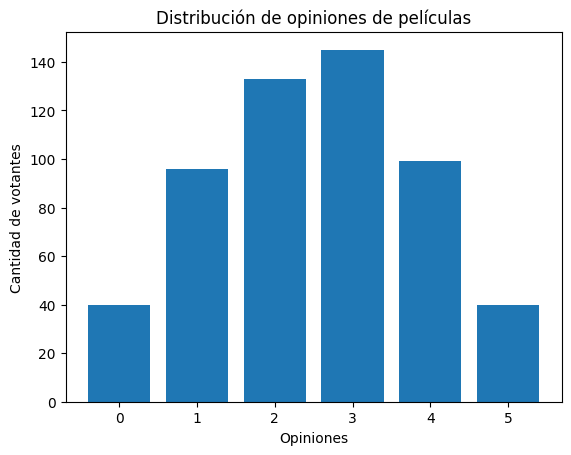

In [10]:
plt.bar(data['Opiniones'], data['Votantes'])
plt.xlabel('Opiniones')
plt.ylabel('Cantidad de votantes')
plt.title('Distribución de opiniones de películas')
plt.show()